In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
sns.set(font_scale=1.4)

In [2]:
columns_subset = [
 'sg_uf_residencia',
 'nu_idade',
 'tp_sexo',
 'tp_estado_civil',
 'tp_cor_raca',
 'tp_ano_concluiu',
 'tp_escola',
 'nu_nota_cn',
 'nu_nota_ch',
 'nu_nota_lc',
 'nu_nota_mt',
 'tp_lingua',
 'nu_nota_redacao',
 'q001',
 'q002',
 'q003',
 'q004',
 'q005',
 'q006',
 'q007',
 'q008',
 'q009',
 'q010',
 'q011',
 'q012',
 'q013',
 'q014',
 'q015',
 'q016',
 'q017',
 'q018',
 'q019',
 'q020',
 'q021',
 'q022',
 'q023',
 'q024',
 'q025',
 'q026',
 'q027'
]

In [3]:
conn = sqlite3.connect('microdados_enem2017/database.db')

In [4]:
# isso vai ser bem devagar
gen = pd.read_sql('''SELECT * FROM enem ORDER BY RANDOM()''', conn, chunksize=600000)
df = next(gen).apply(pd.to_numeric)[[x.upper() for x in columns_subset]]
df.columns = [x.lower() for x in df.columns]
df

,sg_uf_residencia,nu_idade,tp_sexo,tp_estado_civil,tp_cor_raca,tp_ano_concluiu,tp_escola,nu_nota_cn,nu_nota_ch,nu_nota_lc,...,q018,q019,q020,q021,q022,q023,q024,q025,q026,q027
0,4,49,1,2,3,7,1,445.3,464.3,421.3,...,0,2,1,0,3,1,1,1,0,0
1,11,32,1,0,1,11,1,469.3,442.1,487.7,...,0,2,0,0,3,0,0,0,0,0
2,1,18,1,0,3,0,2,578.1,479.6,486.2,...,0,1,1,0,1,0,0,0,1,0
3,5,18,1,0,3,0,2,390.3,379.7,385.0,...,0,1,0,0,1,0,0,0,1,0
4,11,27,0,0,1,8,1,591.3,598.1,592.6,...,0,1,1,0,2,0,1,1,0,0
5,15,20,0,0,3,4,1,455.9,479.7,526.2,...,0,1,0,0,2,0,1,1,0,0
6,19,17,1,0,1,0,1,437.3,544.1,489.7,...,0,1,0,0,2,0,0,1,2,0
7,12,18,0,0,3,0,2,393.6,436.8,428.6,...,0,1,1,0,4,0,1,0,1,0
8,26,19,1,0,3,1,1,640.7,662.1,637.1,...,1,4,1,1,4,1,4,1,0,1
9,4,23,1,0,3,3,1,471.0,409.3,489.6,...,0,1,0,0,3,0,1,1,0,0


In [5]:
corrmat = df.corr()

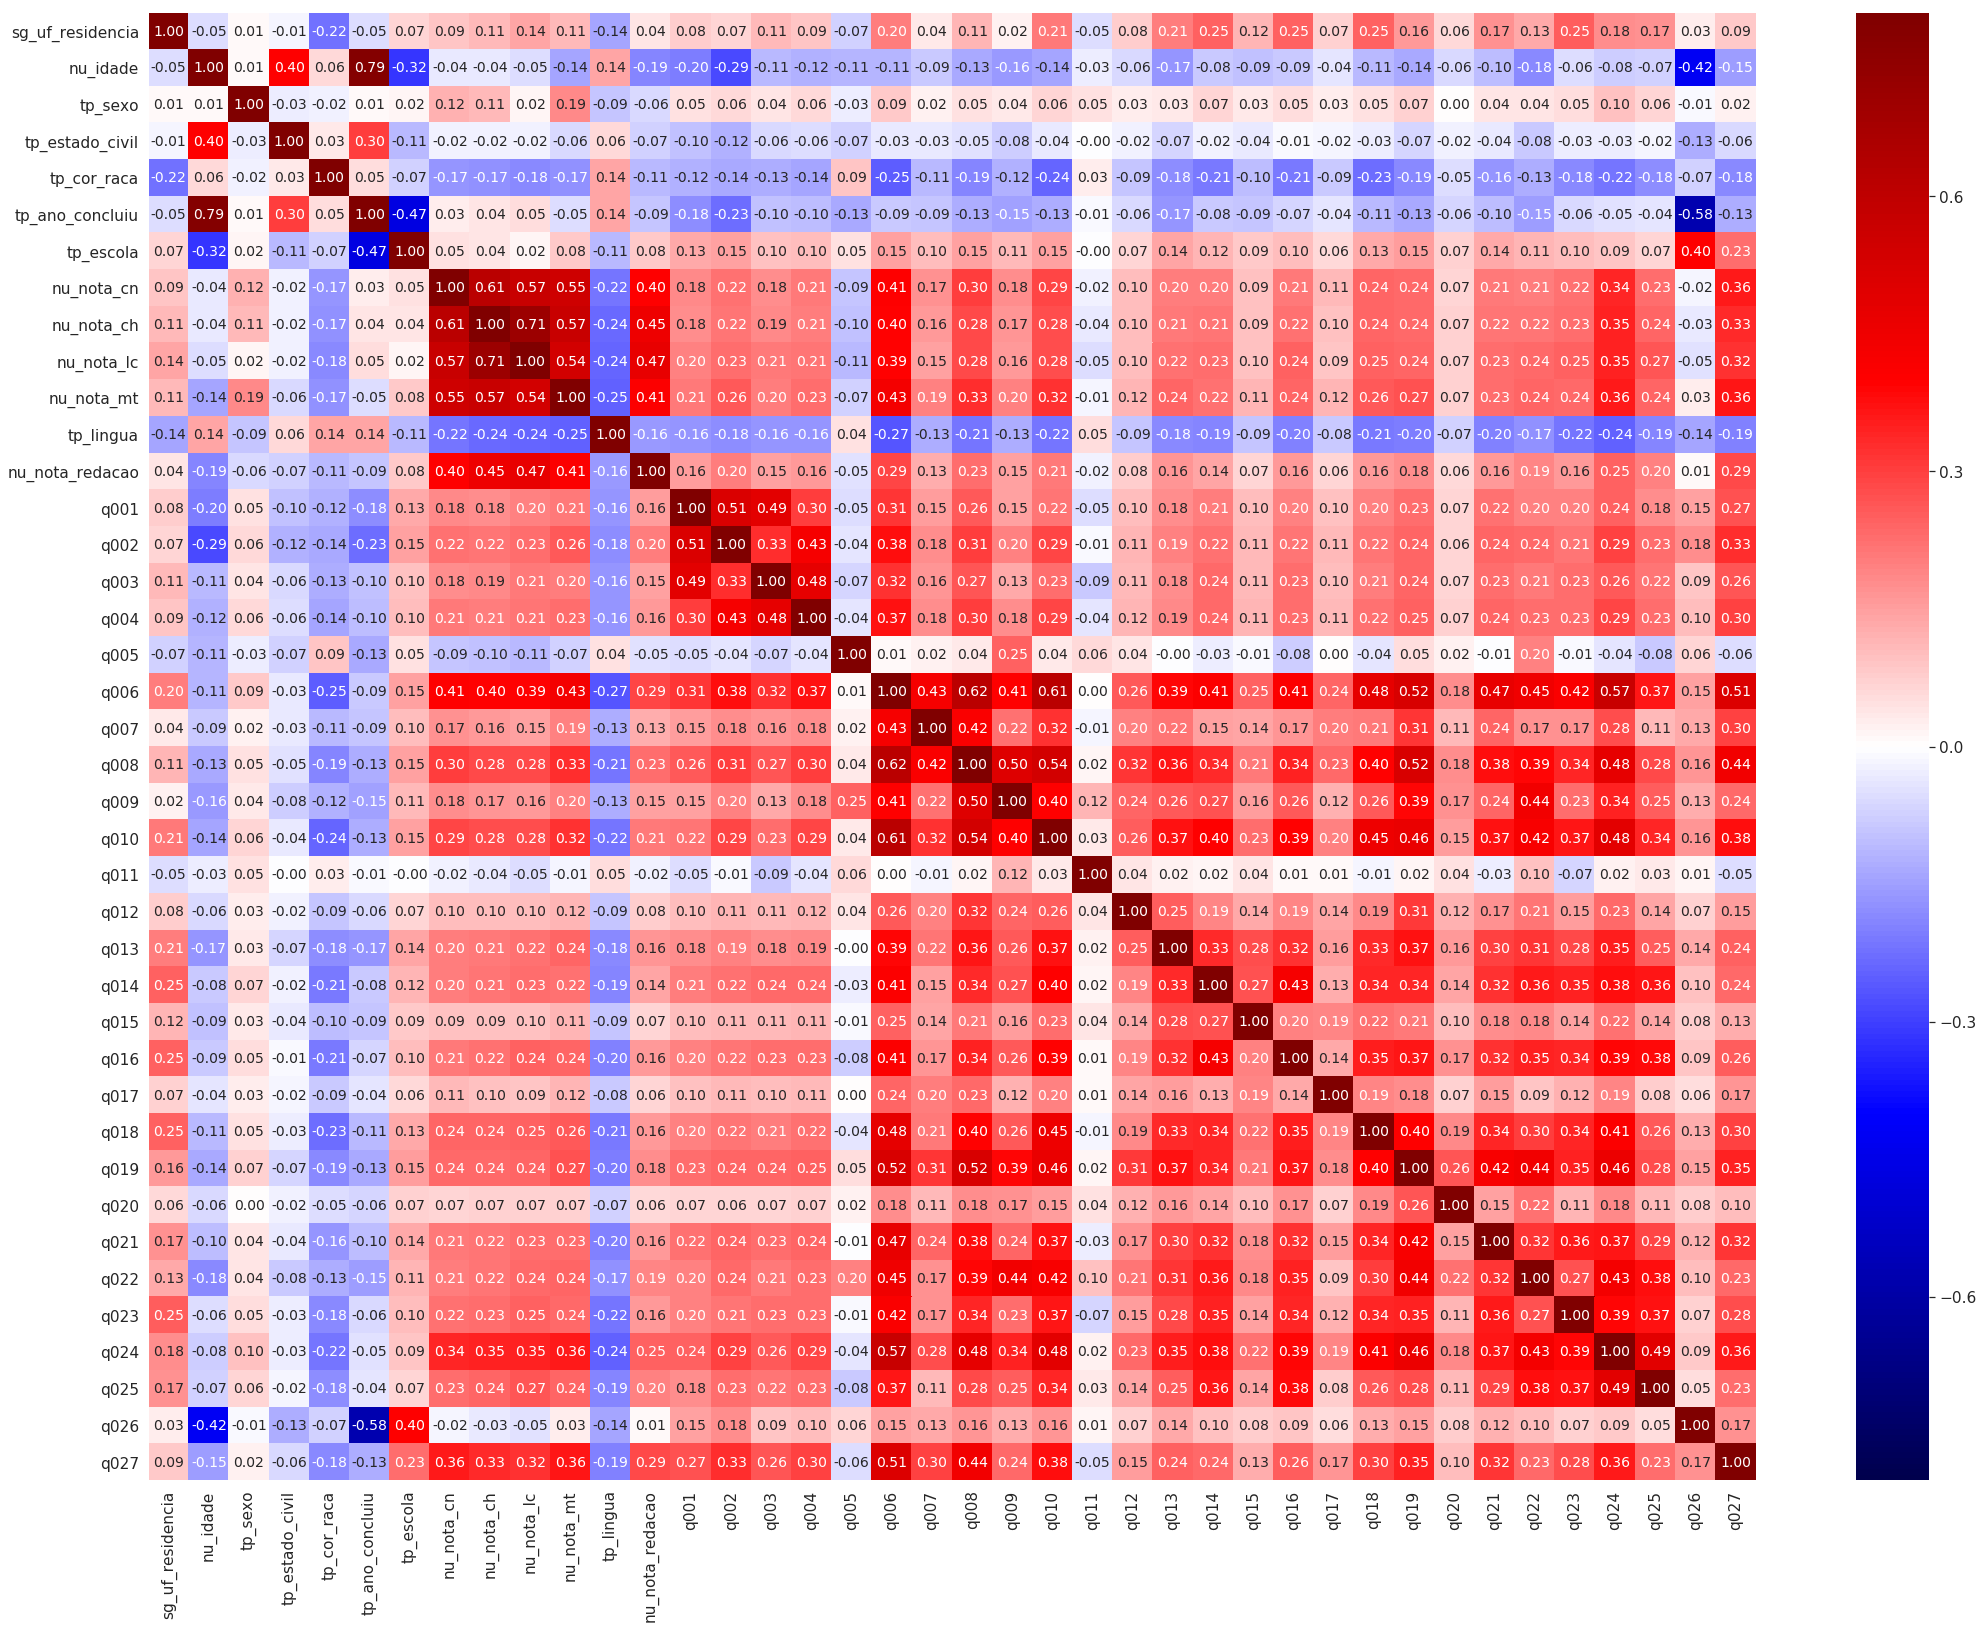

In [6]:
f, ax = plt.subplots(figsize=(36, 27))
sns.heatmap(corrmat, annot=True, fmt='.2f', annot_kws={'size': 14}, cmap='seismic', vmin=-.8, vmax=.8);

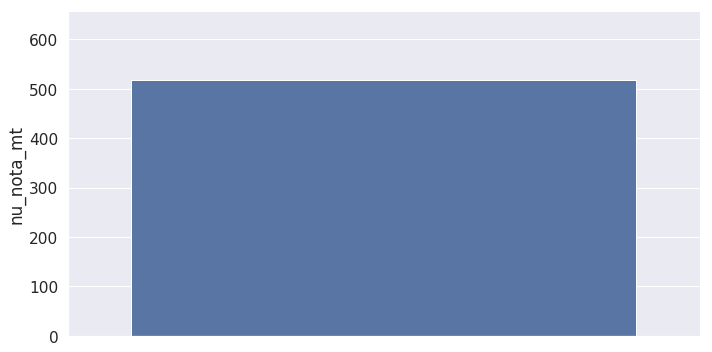

In [7]:
sns.catplot(y='nu_nota_mt', data=df, aspect=2, kind='bar', ci='sd', capsize=.2, errwidth=0)

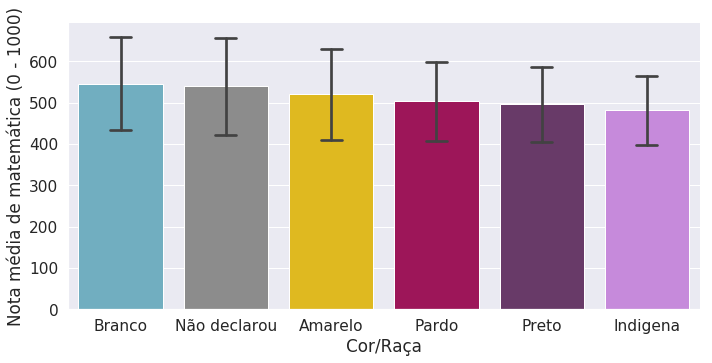

In [8]:
g = sns.catplot(x='tp_cor_raca', y='nu_nota_mt', kind="bar", order=[1,0,4,3,2,5], data=df, aspect=2, ci='sd', capsize=.2,
                palette=['c', '#8c8c8c', '#ffcc00', '#b30059', '#703270', '#cd7de8'])

g.set_axis_labels("Cor/Raça", "Nota média de matemática (0 - 1000)")

g.set_xticklabels(["Branco", "Não declarou", "Amarelo", "Pardo", "Preto", "Indigena"])

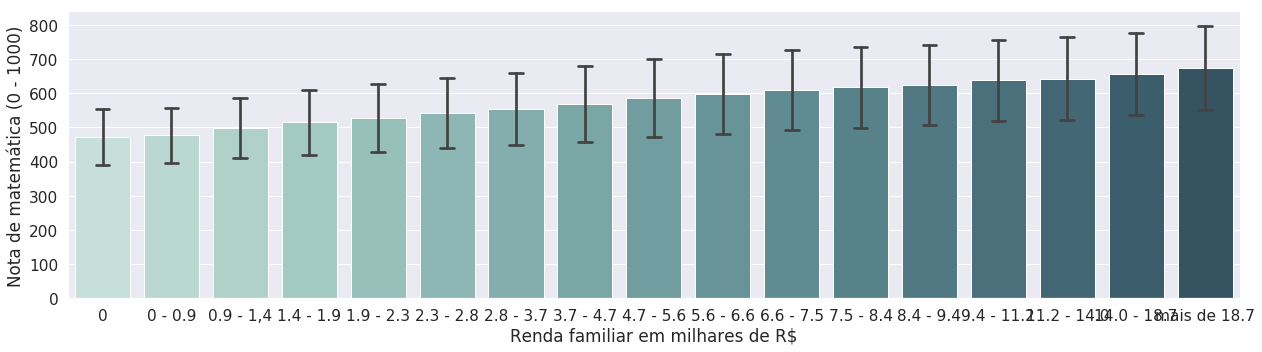

In [9]:
g = sns.catplot(x='q006', y='nu_nota_mt', data=df, kind='bar', aspect=3.5, ci='sd', capsize=.2,
            palette=sns.color_palette("ch:2.8,-.2,dark=.3", n_colors=17))

g.set_axis_labels("Renda familiar em milhares de R$", "Nota de matemática (0 - 1000)")

g.set_xticklabels(["0", 
                   "0 - 0.9", 
                   "0.9 - 1,4", 
                   "1.4 - 1.9", 
                   "1.9 - 2.3", 
                   "2.3 - 2.8", 
                   "2.8 - 3.7", 
                   "3.7 - 4.7", 
                   "4.7 - 5.6",
                   "5.6 - 6.6",
                   "6.6 - 7.5",
                   "7.5 - 8.4",
                   "8.4 - 9.4",
                   "9.4 - 11.2",
                   "11.2 - 14.0",
                   "14.0 - 18.7",
                   "mais de 18.7"])

In [10]:
brancos_e_ricos = df[(df['tp_cor_raca'] == 1)& (df['q006'] > 10)]
brancos = df[df['tp_cor_raca'] == 1]
len(brancos_e_ricos),len(brancos),len(brancos_e_ricos)/len(brancos)

(23558, 218835, 0.1076518838394224)

In [11]:
negros_e_ricos = df[(df['tp_cor_raca'] == 2) & (df['q006'] > 10)]
negros = df[df['tp_cor_raca'] == 2]
len(negros_e_ricos),len(negros),len(negros_e_ricos)/len(negros)

(1340, 75240, 0.017809675704412546)

In [12]:
asiaticos_e_ricos = df[(df['tp_cor_raca'] == 4) & (df['q006'] > 10)]
asiaticos = df[df['tp_cor_raca'] == 4]
len(asiaticos_e_ricos),len(asiaticos),len(asiaticos_e_ricos)/len(asiaticos)

(816, 13995, 0.05830653804930332)

In [13]:
pardos_e_ricos = df[(df['tp_cor_raca'] == 3)& (df['q006'] > 10)]
pardos = df[df['tp_cor_raca'] == 3]
len(pardos_e_ricos),len(pardos),len(pardos_e_ricos)/len(pardos)

(7197, 277229, 0.025960487539182408)

In [14]:
indigenas_e_ricos = df[(df['tp_cor_raca'] == 5)& (df['q006'] > 10)]
indigenas = df[df['tp_cor_raca'] == 5]
len(indigenas_e_ricos),len(indigenas),len(indigenas_e_ricos)/len(indigenas)

(50, 3482, 0.014359563469270534)

In [15]:
ricos = df[df['q006'] > 10]
len(ricos),len(df),len(ricos)/len(df)

(33969, 600000, 0.056615)

In [16]:
len(df[(df['tp_cor_raca'] == 1) & (df['q006'] > 15)]),len(df[(df['tp_cor_raca'] == 2) & (df['q006'] > 15)])

(5216, 135)

In [17]:
len(brancos),len(negros)

(218835, 75240)

In [18]:
len(brancos_e_ricos[brancos_e_ricos["tp_escola"] == 2]),len(negros_e_ricos[negros_e_ricos["tp_escola"] == 2])

(1246, 147)

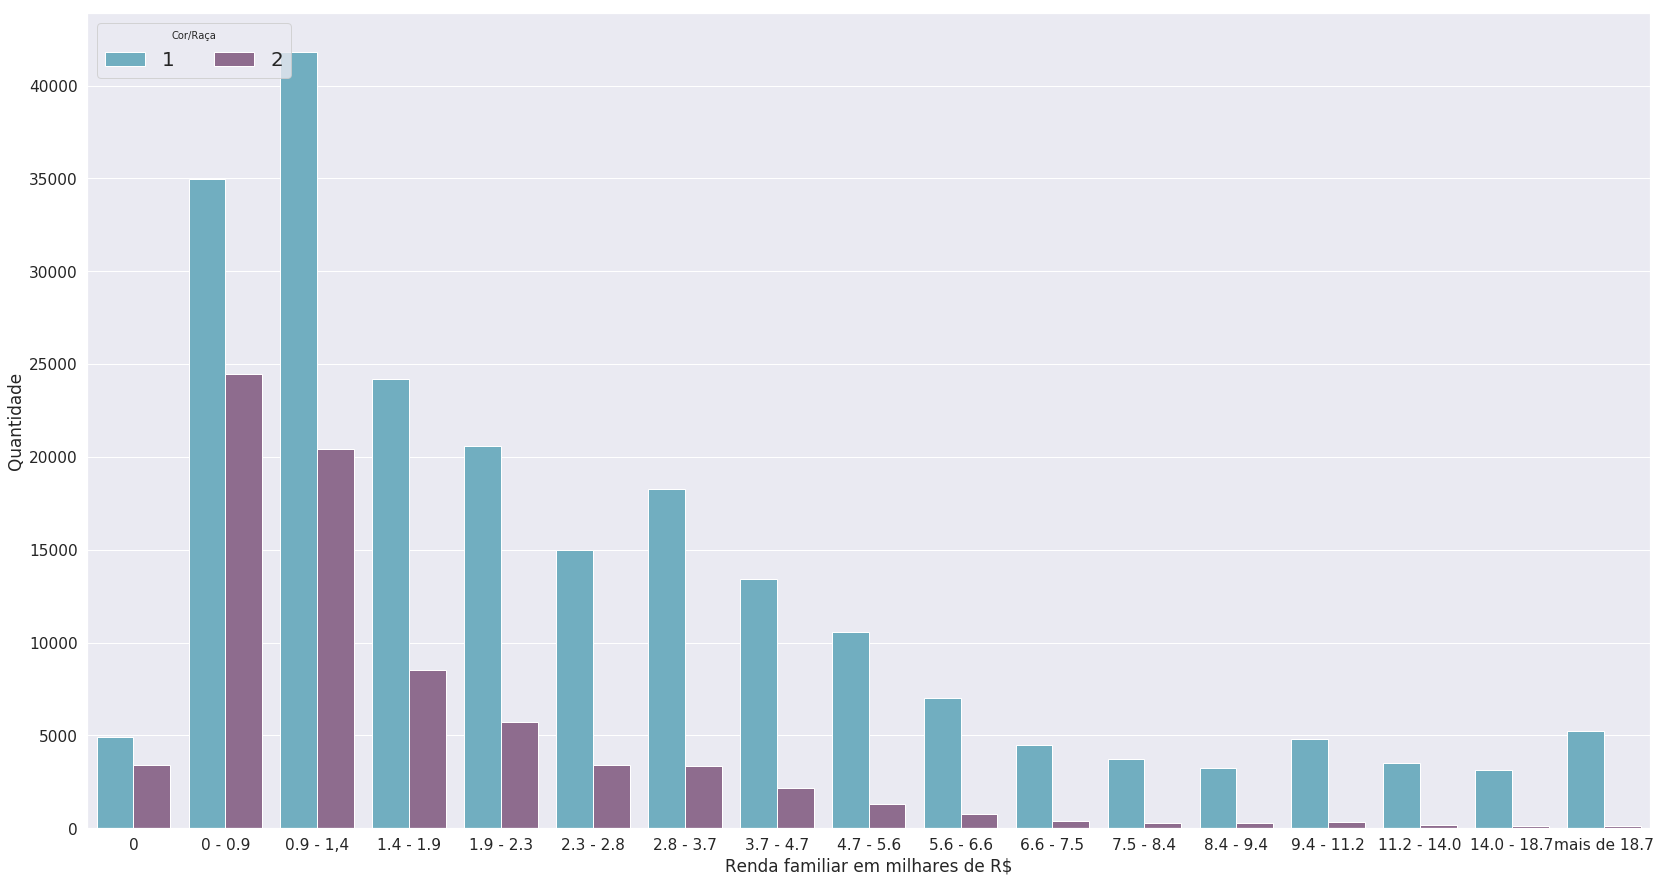

In [19]:
fig, ax = plt.subplots(figsize=(28,15))
sns.countplot(x='q006', data=pd.concat([brancos, negros]), hue='tp_cor_raca', ax=ax,
              palette=['c', '#946694'])
ax.set(xlabel ="Renda familiar em milhares de R$", ylabel ="Quantidade",
       xticklabels =["0", 
                     "0 - 0.9", 
                     "0.9 - 1,4", 
                     "1.4 - 1.9", 
                     "1.9 - 2.3", 
                     "2.3 - 2.8", 
                     "2.8 - 3.7", 
                     "3.7 - 4.7", 
                     "4.7 - 5.6",
                     "5.6 - 6.6",
                     "6.6 - 7.5",
                     "7.5 - 8.4",
                     "8.4 - 9.4",
                     "9.4 - 11.2",
                     "11.2 - 14.0",
                     "14.0 - 18.7",
                     "mais de 18.7"])
ax.legend(ncol=2, loc="upper left", fontsize=20, title='Cor/Raça')

ax

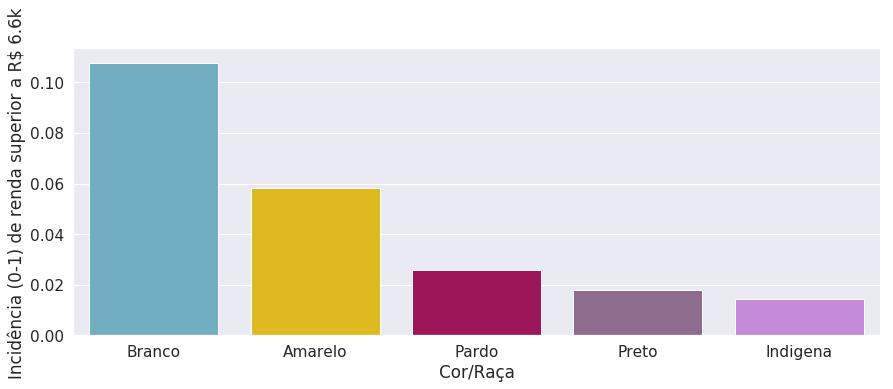

In [20]:
raca_riqueza = pd.DataFrame({'tp_cor_raca': [1,2,3,4,5], 
                             'incidencia_ricos': [
                                  len(brancos_e_ricos)/len(brancos),
                                  len(asiaticos_e_ricos)/len(asiaticos),
                                  len(pardos_e_ricos)/len(pardos),
                                  len(negros_e_ricos)/len(negros),
                                  len(indigenas_e_ricos)/len(indigenas)
                             ]})

g = sns.catplot(x='tp_cor_raca', y='incidencia_ricos', data=raca_riqueza, kind='bar', aspect=2.5,
           palette=['c', '#ffcc00', '#b30059', '#946694', '#cd7de8'])

g.set_xticklabels(["Branco", "Amarelo", "Pardo", "Preto", "Indigena"])

g.set_axis_labels("Cor/Raça", "Incidência (0-1) de renda superior a R$ 6.6k")

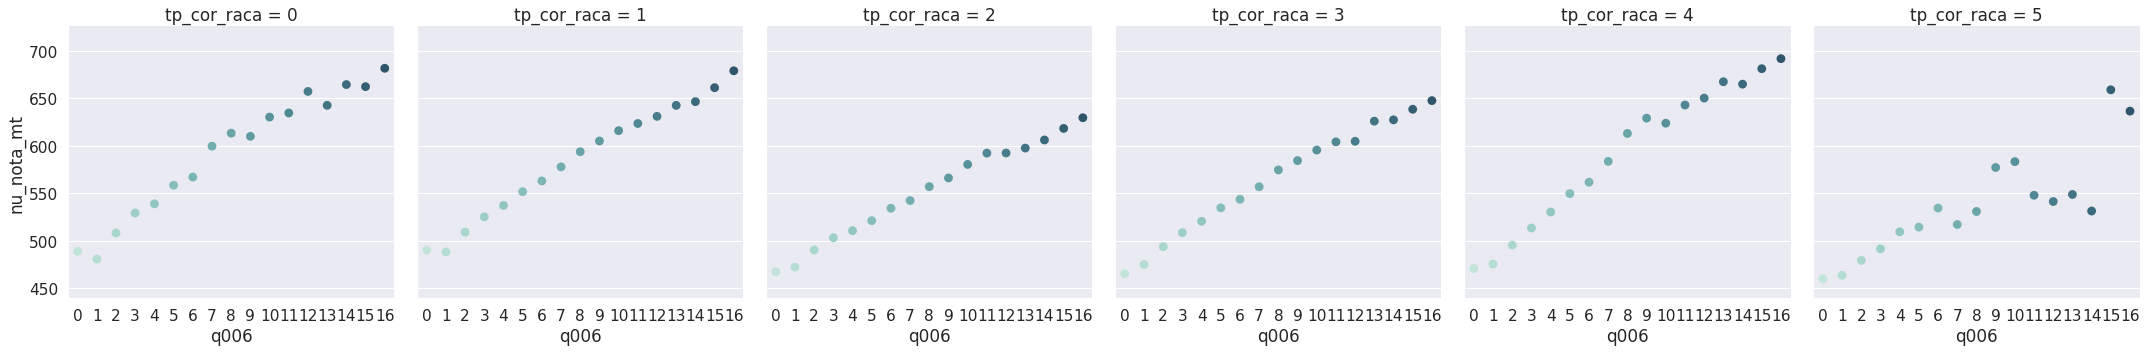

In [21]:
sns.catplot(x='q006', y='nu_nota_mt', errwidth=0, col='tp_cor_raca', data=df, kind='point',
            palette=sns.color_palette("ch:2.8,-.2,dark=.3", n_colors=17))

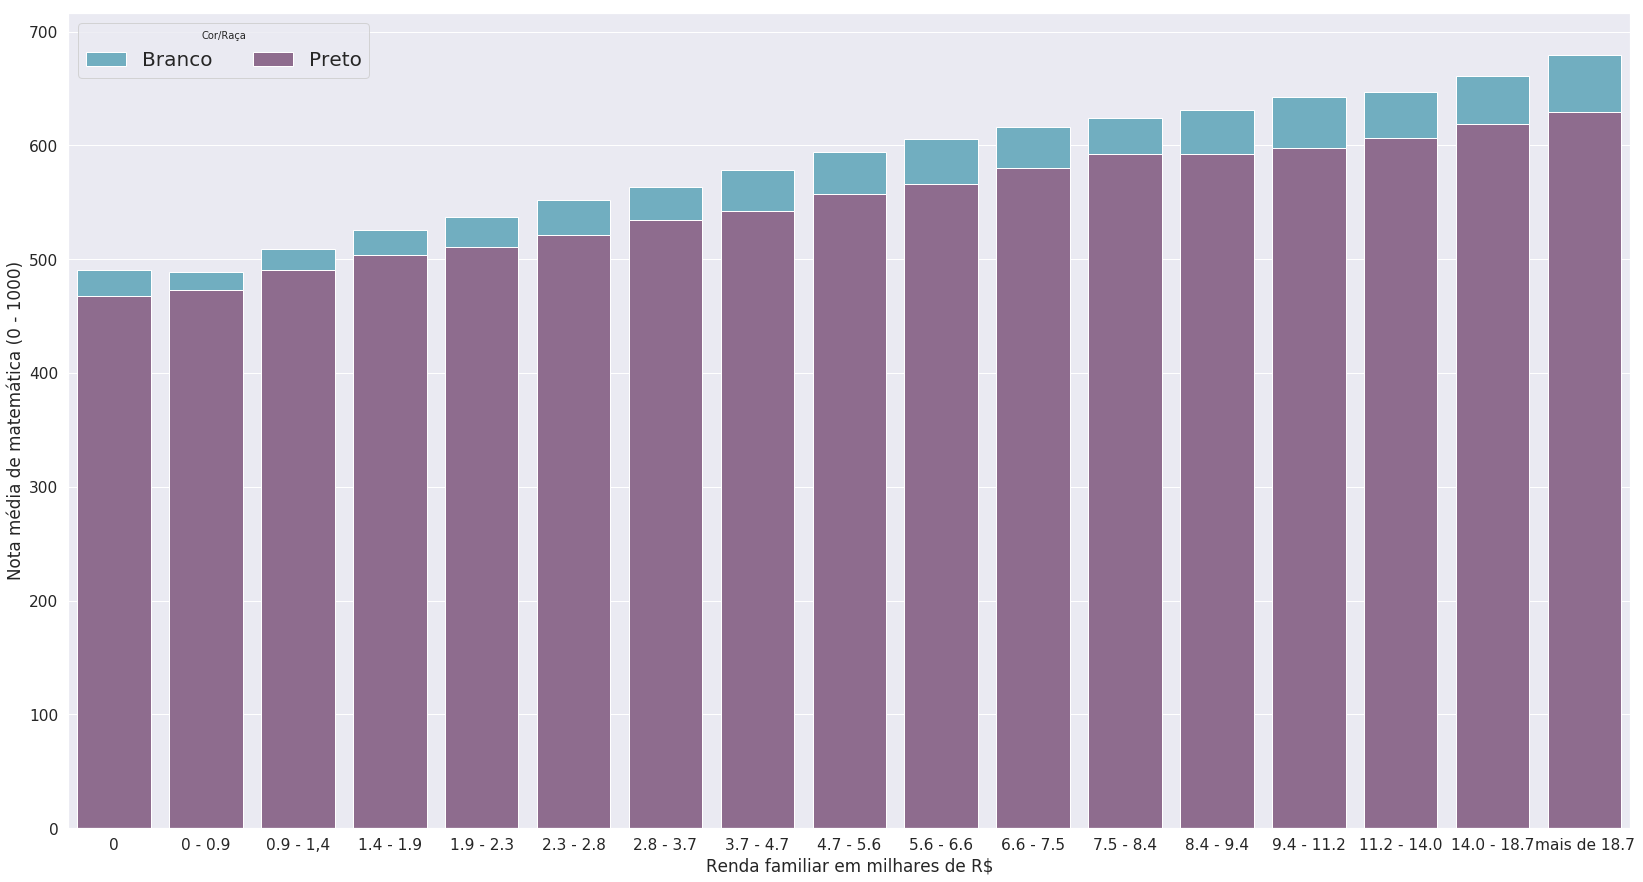

In [22]:
fig, ax = plt.subplots(figsize=(28,15))
sns.barplot(x='q006', y='nu_nota_mt', data=brancos, errwidth=0, color='c', ax=ax, label='Branco', capsize=.2)
sns.barplot(x='q006', y='nu_nota_mt', data=negros, errwidth=0, color='#946694', ax=ax, label='Preto', capsize=.2)

ax.set(xlabel ="Renda familiar em milhares de R$", ylabel ="Nota média de matemática (0 - 1000)",
       xticklabels =["0", 
                     "0 - 0.9", 
                     "0.9 - 1,4", 
                     "1.4 - 1.9", 
                     "1.9 - 2.3", 
                     "2.3 - 2.8", 
                     "2.8 - 3.7", 
                     "3.7 - 4.7", 
                     "4.7 - 5.6",
                     "5.6 - 6.6",
                     "6.6 - 7.5",
                     "7.5 - 8.4",
                     "8.4 - 9.4",
                     "9.4 - 11.2",
                     "11.2 - 14.0",
                     "14.0 - 18.7",
                     "mais de 18.7"])
ax.legend(ncol=2, loc="upper left", fontsize=20, title='Cor/Raça')
ax

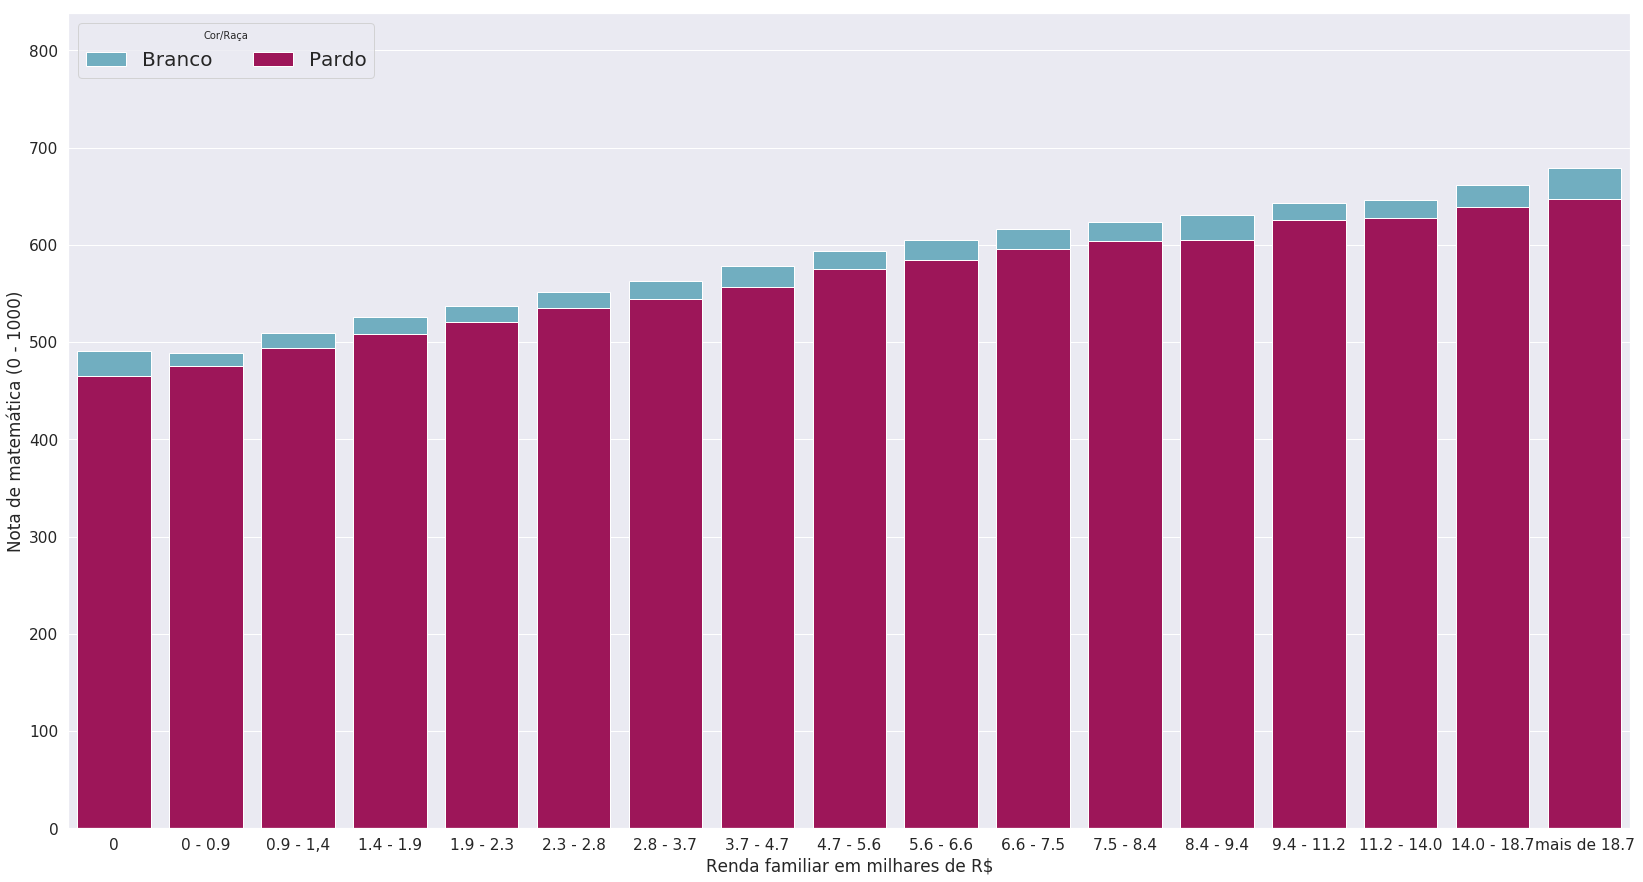

In [23]:
fig, ax = plt.subplots(figsize=(28,15))
sns.barplot(x='q006', y='nu_nota_mt', data=brancos, errwidth=0, color='c', ax=ax, label='Branco', capsize=.2, ci='sd')
sns.barplot(x='q006', y='nu_nota_mt', data=pardos, errwidth=0, color='#b30059', ax=ax, label='Pardo', capsize=.2, ci='sd')

ax.set(xlabel ="Renda familiar em milhares de R$", ylabel ="Nota de matemática (0 - 1000)",
       xticklabels =["0", 
                     "0 - 0.9", 
                     "0.9 - 1,4", 
                     "1.4 - 1.9", 
                     "1.9 - 2.3", 
                     "2.3 - 2.8", 
                     "2.8 - 3.7", 
                     "3.7 - 4.7", 
                     "4.7 - 5.6",
                     "5.6 - 6.6",
                     "6.6 - 7.5",
                     "7.5 - 8.4",
                     "8.4 - 9.4",
                     "9.4 - 11.2",
                     "11.2 - 14.0",
                     "14.0 - 18.7",
                     "mais de 18.7"])
ax.legend(ncol=2, loc="upper left", fontsize=20, title='Cor/Raça')
ax

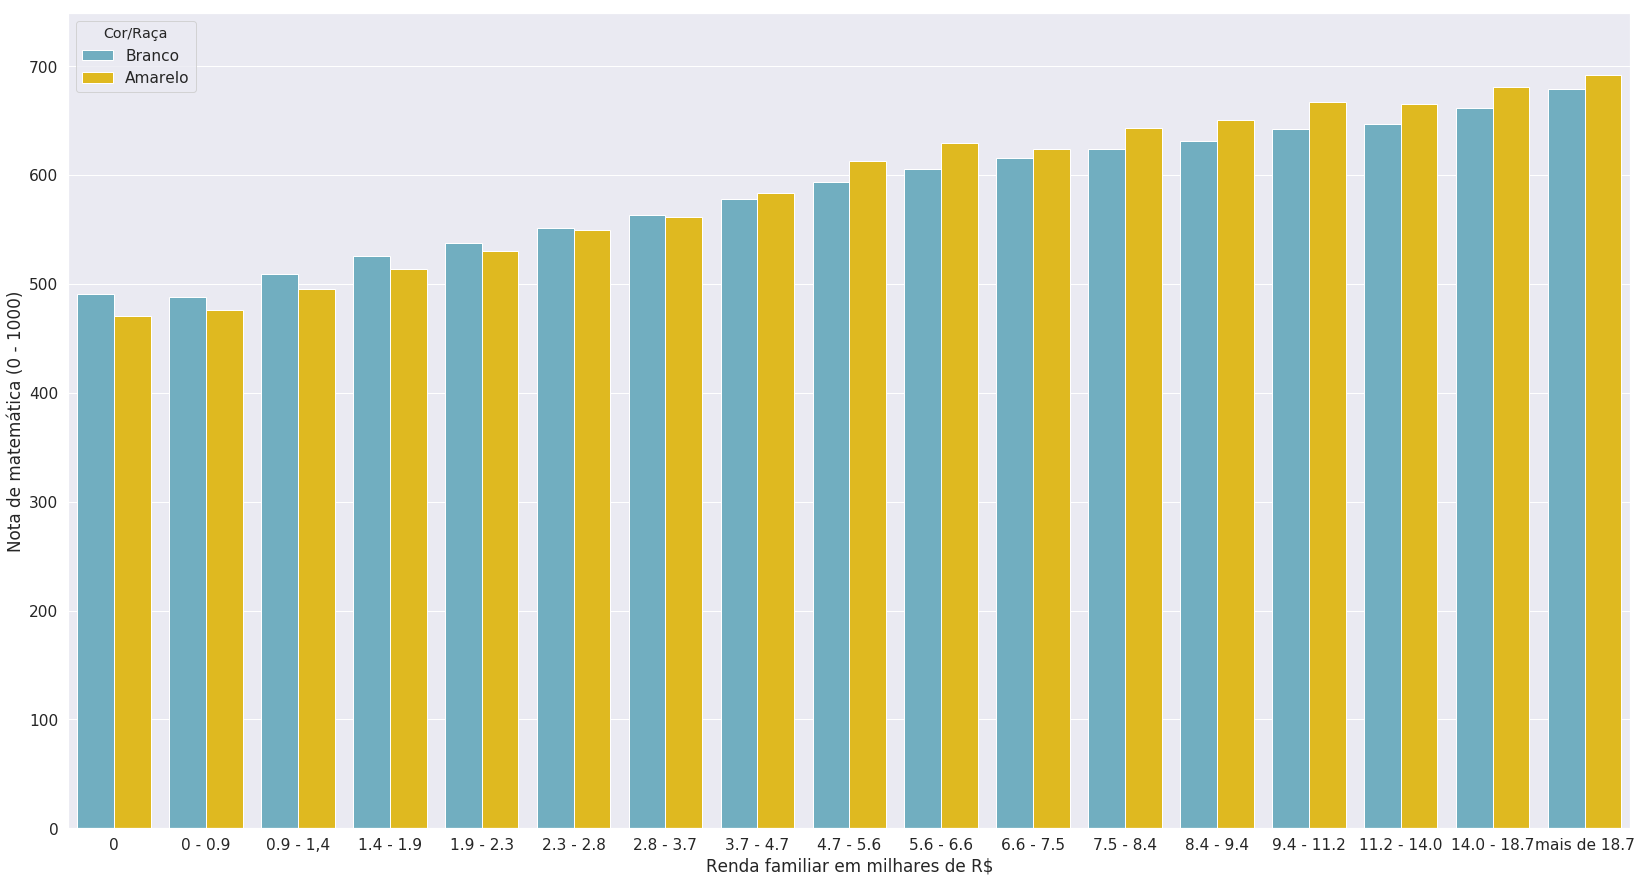

In [24]:
fig, ax = plt.subplots(figsize=(28,15))
g = sns.barplot(x='q006', y='nu_nota_mt', data=pd.concat([brancos, asiaticos]),
                errwidth=0, palette=['c', '#ffcc00'], ax=ax, hue='tp_cor_raca')

g.set(xlabel ="Renda familiar em milhares de R$", ylabel ="Nota de matemática (0 - 1000)",
       xticklabels =["0", 
                     "0 - 0.9", 
                     "0.9 - 1,4", 
                     "1.4 - 1.9", 
                     "1.9 - 2.3", 
                     "2.3 - 2.8", 
                     "2.8 - 3.7", 
                     "3.7 - 4.7", 
                     "4.7 - 5.6",
                     "5.6 - 6.6",
                     "6.6 - 7.5",
                     "7.5 - 8.4",
                     "8.4 - 9.4",
                     "9.4 - 11.2",
                     "11.2 - 14.0",
                     "14.0 - 18.7",
                     "mais de 18.7"])

legend = g.get_legend()

legend.set_title('Cor/Raça')
for t, l in zip(legend.texts,('Branco', 'Amarelo')):
    t.set_text(l)

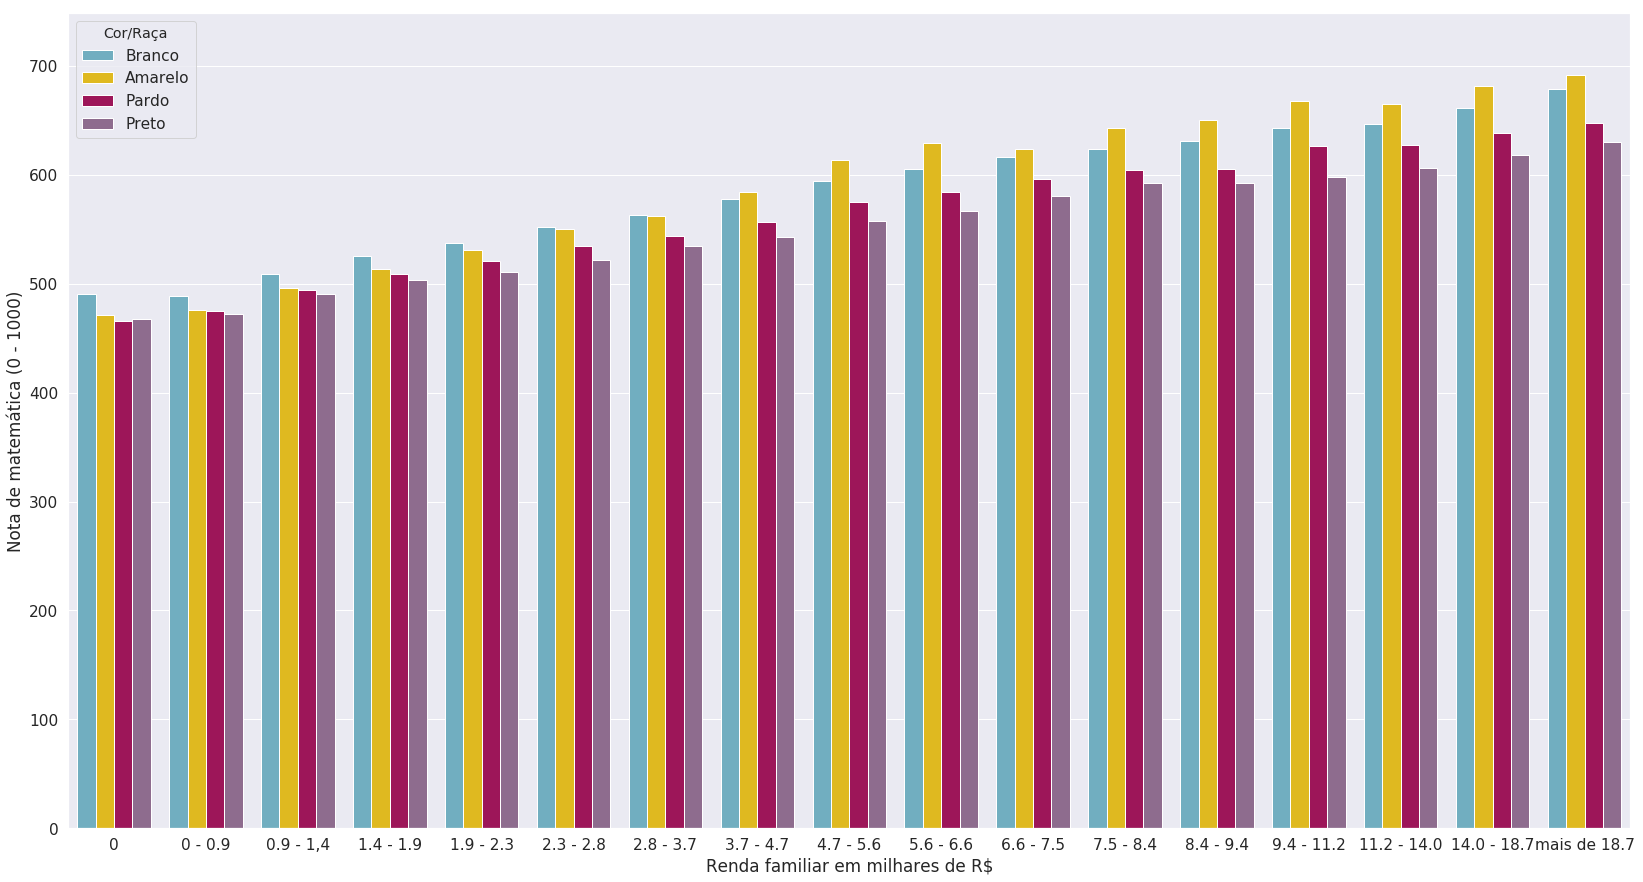

In [25]:
fig, ax = plt.subplots(figsize=(28,15))
g = sns.barplot(x='q006', y='nu_nota_mt', hue='tp_cor_raca', data=df, hue_order=[1,4,3,2], errwidth=0, capsize=.2,
                palette=['c', '#ffcc00', '#b30059', '#946694'], ax=ax)

g.set(xlabel ="Renda familiar em milhares de R$", ylabel ="Nota de matemática (0 - 1000)",
       xticklabels =["0", 
                     "0 - 0.9", 
                     "0.9 - 1,4", 
                     "1.4 - 1.9", 
                     "1.9 - 2.3", 
                     "2.3 - 2.8", 
                     "2.8 - 3.7", 
                     "3.7 - 4.7", 
                     "4.7 - 5.6",
                     "5.6 - 6.6",
                     "6.6 - 7.5",
                     "7.5 - 8.4",
                     "8.4 - 9.4",
                     "9.4 - 11.2",
                     "11.2 - 14.0",
                     "14.0 - 18.7",
                     "mais de 18.7"])

legend = g.get_legend()

legend.set_title('Cor/Raça')
for t, l in zip(legend.texts,('Branco', 'Amarelo', 'Pardo', 'Preto')):
    t.set_text(l)

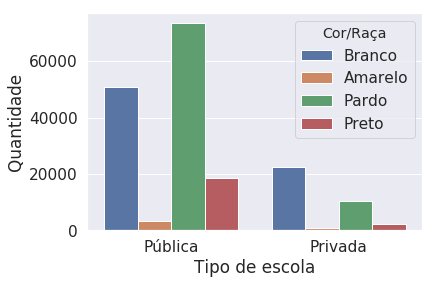

In [26]:
g = sns.countplot(x='tp_escola', hue='tp_cor_raca', order=[2, 3], hue_order=[1,4,3,2], data=df)

g.set(xlabel = "Tipo de escola", ylabel = "Quantidade",
      xticklabels = ['Pública', 'Privada'])

legend = g.get_legend()

legend.set_title('Cor/Raça')
for t, l in zip(legend.texts,('Branco', 'Amarelo', 'Pardo', 'Preto')):
    t.set_text(l)

[Text(0,0.5,'Nota de matemática (0 - 1000)'),
 Text(0.5,0,'Número de banheiros na casa')]

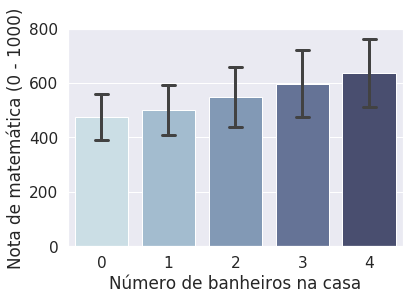

In [27]:
ax = sns.barplot(x='q008', y='nu_nota_mt', data=df, errwidth=3, ci='sd', capsize=.2,
                 palette=sns.color_palette("ch:3.1,-.2,dark=.3", n_colors=5))

ax.set(xlabel = "Número de banheiros na casa", ylabel = "Nota de matemática (0 - 1000)")

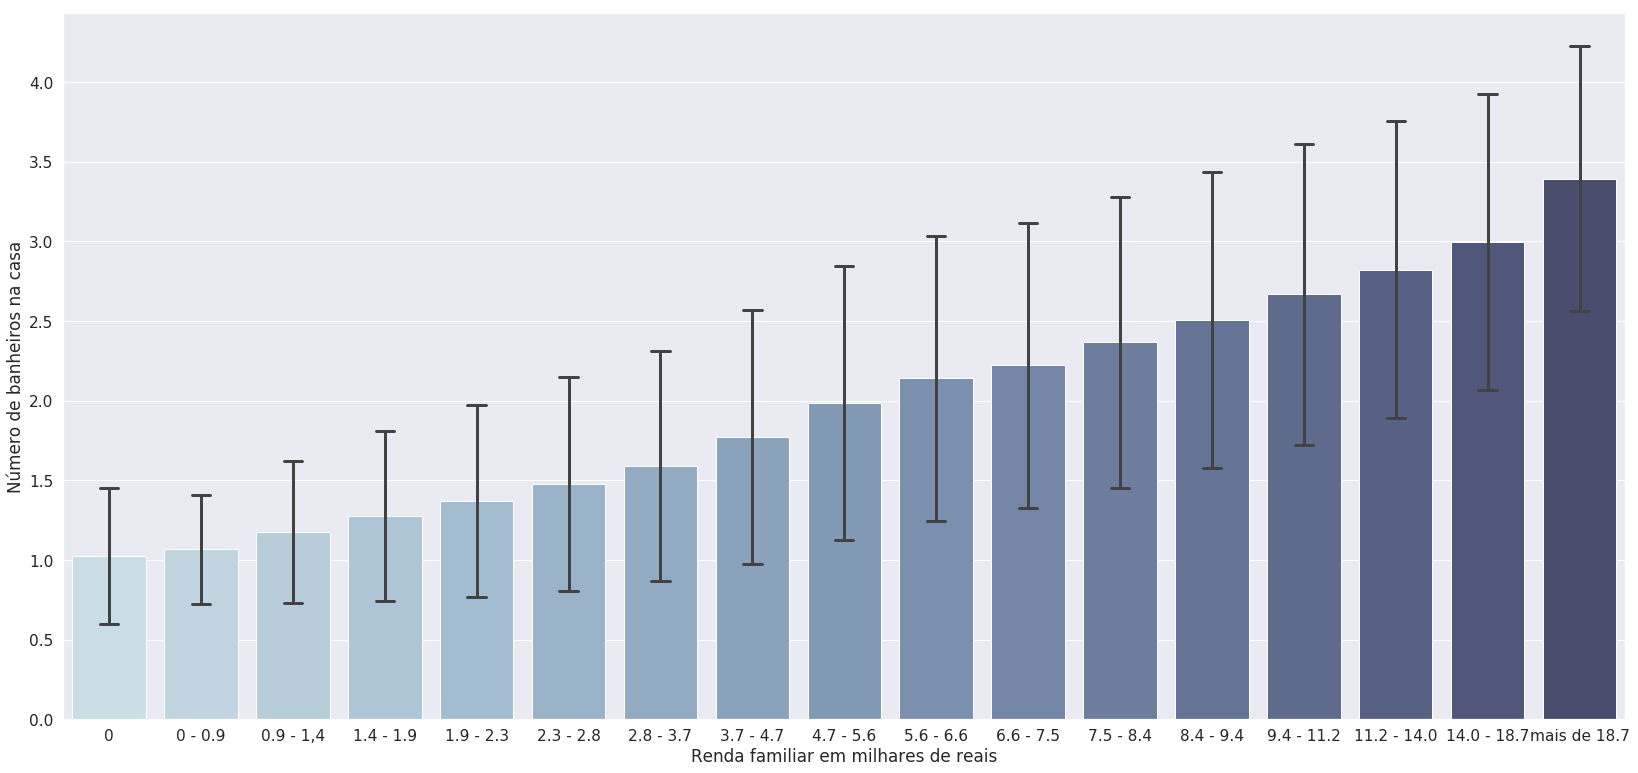

In [28]:
fig, ax = plt.subplots(figsize=(28,13))

ax = sns.barplot(x='q006', y='q008', data=df,  errwidth=3, ci='sd', capsize=.2, ax=ax,
                 palette=sns.color_palette("ch:3.1,-.2,dark=.3", n_colors=17))

ax.set(xlabel = "Renda familiar em milhares de reais", ylabel = "Número de banheiros na casa",
       xticklabels =["0", 
                     "0 - 0.9", 
                     "0.9 - 1,4", 
                     "1.4 - 1.9", 
                     "1.9 - 2.3", 
                     "2.3 - 2.8", 
                     "2.8 - 3.7", 
                     "3.7 - 4.7", 
                     "4.7 - 5.6",
                     "5.6 - 6.6",
                     "6.6 - 7.5",
                     "7.5 - 8.4",
                     "8.4 - 9.4",
                     "9.4 - 11.2",
                     "11.2 - 14.0",
                     "14.0 - 18.7",
                     "mais de 18.7"])
ax

[Text(0,0.5,'Nota de matemática (0 - 1000)'),
 [Text(0,0,'Exterior'), Text(0,0,'Privada'), Text(0,0,'Pública')],
 Text(0.5,0,'Tipo de escola frequentada')]

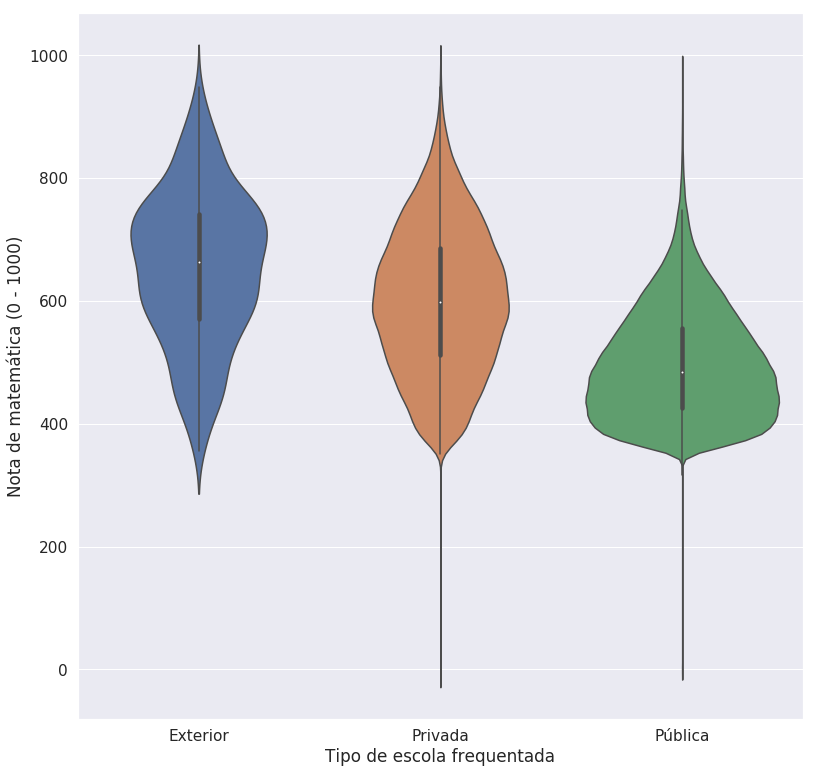

In [32]:
escola_publica = df[df['tp_escola'] == 2]
escola_particular = df[df['tp_escola'] == 3]
escola_exterior = df[df['tp_escola'] == 4]

fig, ax = plt.subplots(figsize=(13,13))

ax = sns.violinplot(x='tp_escola', y='nu_nota_mt', data=df, errwidth=3, order=[4,3,2], ax=ax)

ax.set(xlabel = "Tipo de escola frequentada", ylabel = "Nota de matemática (0 - 1000)",
       xticklabels = ['Exterior', 'Privada', 'Pública'])

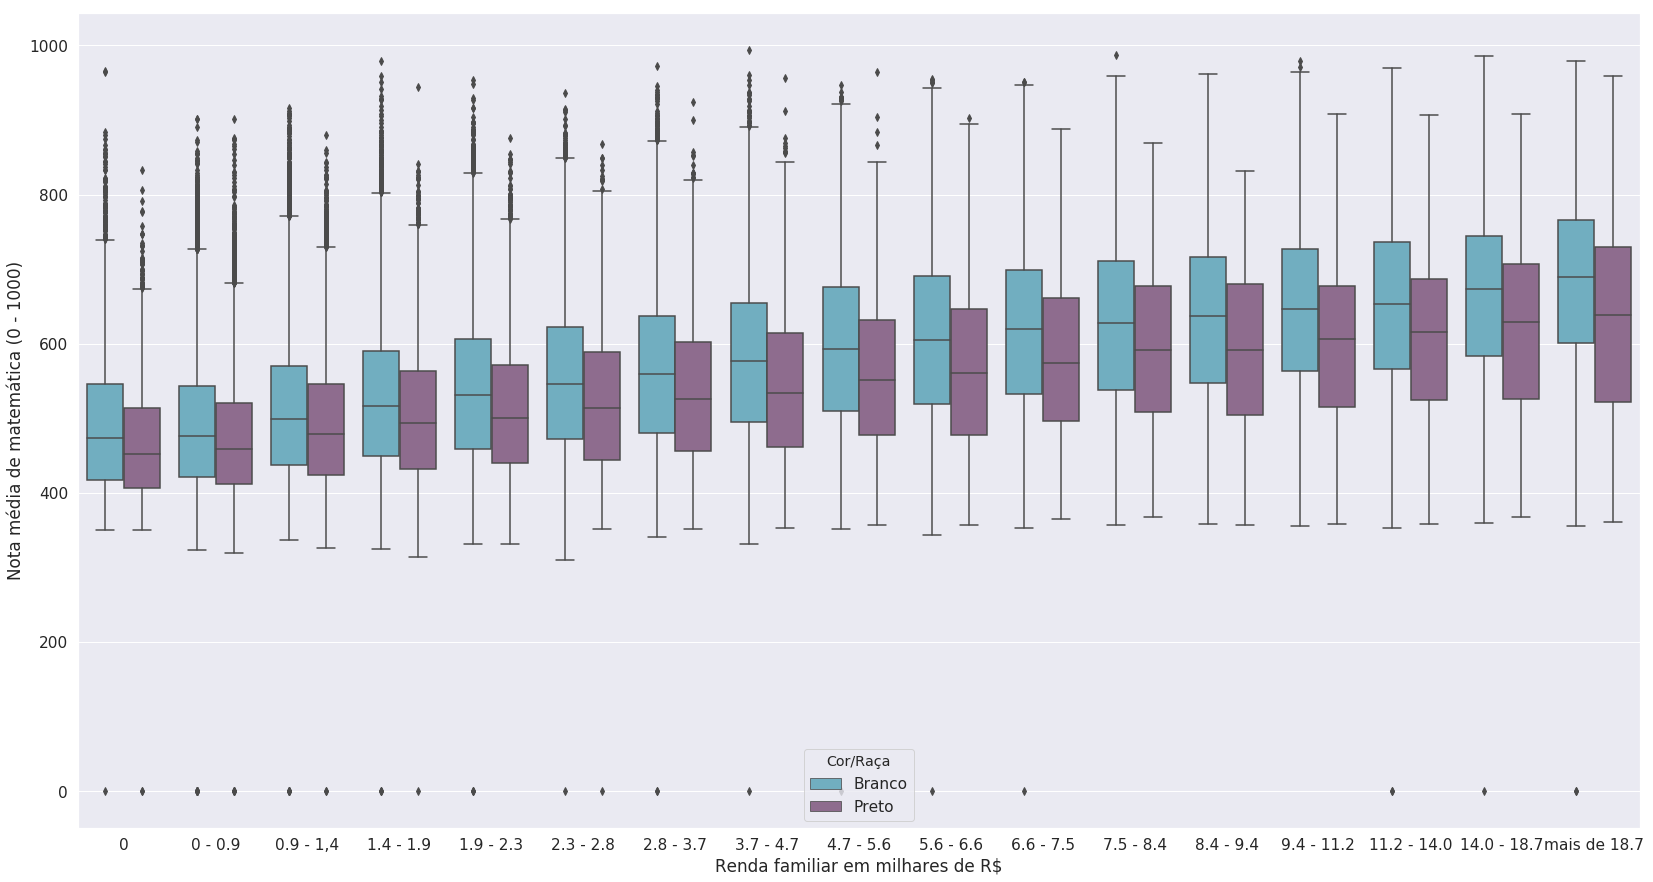

In [30]:
fig, ax = plt.subplots(figsize=(28,15))
g = sns.boxplot(x='q006', y='nu_nota_mt', data=df, hue='tp_cor_raca', hue_order=[1, 2], ax=ax,
               palette=['c', '#946694'])

legend = g.get_legend()

legend.set_title('Cor/Raça')
for t, l in zip(legend.texts,('Branco', 'Preto')):
    t.set_text(l)

ax.set(xlabel ="Renda familiar em milhares de R$", ylabel ="Nota média de matemática (0 - 1000)",
       xticklabels =["0", 
                     "0 - 0.9", 
                     "0.9 - 1,4", 
                     "1.4 - 1.9", 
                     "1.9 - 2.3", 
                     "2.3 - 2.8", 
                     "2.8 - 3.7", 
                     "3.7 - 4.7", 
                     "4.7 - 5.6",
                     "5.6 - 6.6",
                     "6.6 - 7.5",
                     "7.5 - 8.4",
                     "8.4 - 9.4",
                     "9.4 - 11.2",
                     "11.2 - 14.0",
                     "14.0 - 18.7",
                     "mais de 18.7"])
ax

[Text(0,0.5,'Nota de Linguagens e Códigos (0-1000)'),
 [Text(0,0,'Masculino'), Text(0,0,'Feminino')],
 Text(0.5,0,'Sexo')]

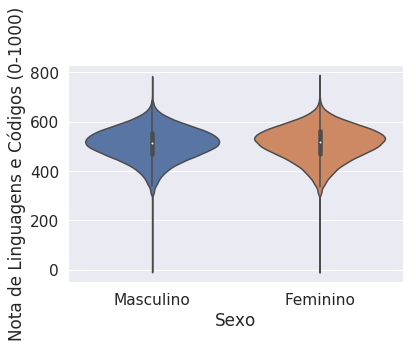

In [31]:
ax = sns.violinplot(x='tp_sexo', y='nu_nota_lc', data=df, errwidth=3)

ax.set(xlabel = "Sexo", ylabel = "Nota de Linguagens e Códigos (0-1000)",
       xticklabels = ['Masculino', 'Feminino'])